In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:800px !important; }</style>"))

# Distribuzione t-Student
Analisi di alcune funzoini con python.

Le versioni delle librerie usate in questo esempio :

In [3]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

Python: 3.7.7 (default, May  7 2020, 21:25:33) 
[GCC 7.3.0]
scipy: 1.5.2
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.3


# Ottenere alcune statistiche 
```python
from  scipy import stats
stats.t.stats(df, moments='mvsk')
```

In [4]:
from  scipy import stats
df=8   # Gradi di liberta'
mean, var, skew, kurt = stats.t.stats(df, moments='mvsk')
print("Media               : {:2.6f}".format(mean))
print("Varianza            : {:2.6f}".format(var))
print("Skewness (simmetria): {:2.6f}".format(skew))
print("Curtosi             : {:2.6f}".format(kurt))


Media               : 0.000000
Varianza            : 1.333333
Skewness (simmetria): 0.000000
Curtosi             : 1.500000


# Plottare una distribuzione ed ottenere la pdf

<p style="font-size:120%;">
Disegnamo una alcune distribuzioni t-Stdent condiversi gradi di liberta' <br>
Utlizzermo  :<br>
Il modulo stats della libreria scipy , classe t e metodo pdf(): <br>
</p> 

```python
from  scipy import stats
stats.t.pdf(x, df)
```

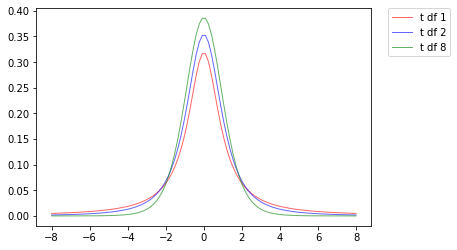

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats

fig, ax = plt.subplots(1, 1)
A=8
# Creo uno spazio lineare da -A a +A di cento punti
x = np.linspace(-A, A, 100)

#Per ogni valore di x ho y= stats.t.pdf(x,df),
#ovvero PDF di distribuzione t-Student con df gradi di liberta'
df=1
ax.plot(x, stats.t.pdf(x, df), 'r-', lw=1, alpha=0.6,
        label='t df {}'.format(df))
df=2
ax.plot(x, stats.t.pdf(x, df), 'b-', lw=1, alpha=0.6, 
        label='t df {}'.format(df))
df=8
ax.plot(x, stats.t.pdf(x, df), 'g-', lw=1, alpha=0.6,
        label='t df {}'.format(df))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Densita' di probabilita'  (probabilty density function)

<p style="font-size:140%;">Utilizzo  modulo stats classe t e metodo pdf(x,df) </p>

```python
# Si importa il modulo stats
from  scipy import stats
stats.t.pdf(x, df) #(x=punto o punti, df= gradi di liberta

```


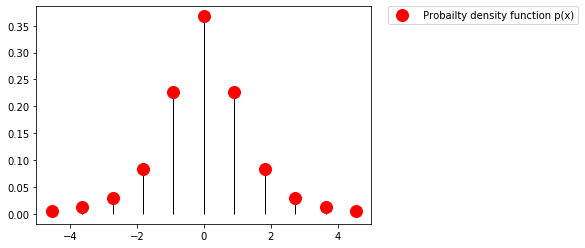

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats

fig, ax = plt.subplots(1, 1)
df=3
A=3
# Creo uno spazio lineare da -A a +A di cento punti
# stats.t.ppf(0.01, df) : inversa della cumulativa :
# da area=0.01 ad area=0.99
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 11)

pk=stats.t.pdf(x, df)
# Disegno la funzione di probabilita' sugli assi[1] del subplot
ax.plot(x, pk, 'ro', ms=12, mec='r',
        label=" Probailty density function p(x)")
ax.vlines(x, 0,pk, colors='black', lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
l=0

# Inversa della cumulativa

<p style="font-size:180%;">Utilizzo  i seguenti metodi per ottenre i valori di X (ovvero t) dato un quantile (area) </p>

```python
# Si importa il modulo stats
from  scipy import stats
stats.t.ppf(q=quantilesx, df, loc=0, scale=1) # Punto X di un area
stats.t.isf(q=quantiledx, df, loc=0, scale=1) #Inverse survival function (inverse of sf).
stats.t.interval(alpha, df, loc=0, scale=1) # Intervallo di un'area centrale


```

## Conoscendo l'area centrale ricavo gli estremi

<p style="font-size:140%;">Utilizzo del metodo interval della classe t </p>

```python
# Si importa il modulo stats
from  scipy import stats
# Intervalli dell'area centrale alpha
T=stats.t.interval(alpha, df, loc=0, scale=1) ```

Estremo sinistro T[0] : -1.860
Estremo destro   T[1] : 1.860
 Area centrale   (alpha , noto)  : 0.900


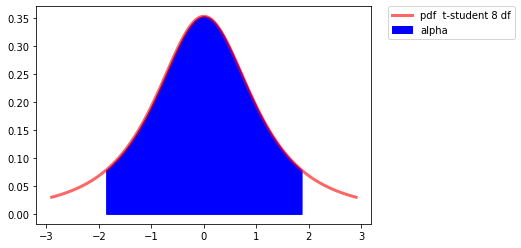

In [301]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats
df = 8

fig, ax = plt.subplots(1, 1)

# Plotto la curva
# stats.t.ppf(0.01, df) : inversa della cumulativa : da area=0.01 ad area=0.99
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)
y=stats.t.pdf(x, 2)
ax.plot(x, y, 'r-', lw=3, alpha=0.6, 
        label='pdf  t-student {} df'.format(df))

# AREA CENTRALE : 
alpha=0.90
# Intervalli dell'area centrale alpha
T=stats.t.interval(alpha, df, loc=0, scale=1) 
# Punto sinistro T[0]
# Punto destro  T[1]
x1= np.linspace(T[0],T[1], 100)

ax.fill_between(x1,stats.t.pdf(x1, 2), color='blue',label="alpha")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

print("Estremo sinistro T[0] : {:2.3f}".format(T[0]))
print("Estremo destro   T[1] : {:2.3f}".format(T[1]))
print(" Area centrale   (alpha , noto)  : {:2.3f}".format(alpha))

## Plotto le code
<p style="font-size:140%;">
Conosco l'area centrale , calcolo i due punti estremi e le aree delle code: <br>
</p> 

```python
from  scipy import stats
T=stats.t.interval(alpha=areacentrale, df=gradiliberta, loc=0, scale=1) 
T[0]= Estremo sinistro
T[1]= Estremo destro
```

Estremo sinistro t1 : -1.860
Estremo destro   t2 : 1.860
 Area centrale   (alpha noto )  : 0.900
 Area 2 code   (1-alpha )  : 0.100
 Area 1 coda   (1-alpha )/2: 0.050


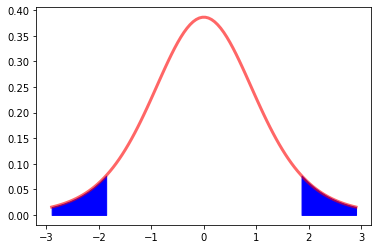

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats
df = 8

fig, ax = plt.subplots(1, 1)
# stats.t.ppf(0.01, df) : inversa della cumulativa : da area=0.01 ad area=0.99
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)

y=stats.t.pdf(x, df)

ax.plot(x, y, 'r-', lw=3, alpha=0.6, label='t pdf')
# AREA CENTRALE 
alpha=0.90
T=stats.t.interval(alpha, df, loc=0, scale=1) 
T[0]
x1= np.linspace(x[0],T[0], 10)
x2= np.linspace(T[1],x[-1], 10)
ax.fill_between(x1,stats.t.pdf(x1, df), color='blue')
ax.fill_between(x2,stats.t.pdf(x2, df), color='blue')
print("Estremo sinistro t1 : {:2.3f}".format(T[0]))
print("Estremo destro   t2 : {:2.3f}".format(T[1]))
print(" Area centrale   (alpha noto )  : {:2.3f}".format(alpha))
print(" Area 2 code   (1-alpha )  : {:2.3f}".format(1-alpha))
print(" Area 1 coda   (1-alpha )/2: {:2.3f}".format((1-alpha)/2))


## Conosco area (quantile) sinistra : ottenere punto critico
<p style="font-size:140%;">Utilizzo della funzione ppf : Percent Point Function (inverse of cdf — percentiles).</p> 

```python
from  scipy import stats
qunatile=0.05
stats.t.ppf(q=quantile, df, loc=0, scale=1) 
```

Punto T (calcolato): -1.860
Area coda sinistra (nota) 0.050


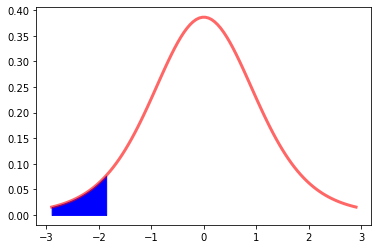

In [306]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats
df = 8

fig, ax = plt.subplots(1, 1)
# Asse x : dal probabilita 0.01 a 0.99
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)
#Y=  Valore distribuzione nel puntox 
y=stats.t.pdf(x, df)
# Plot distribuzione
ax.plot(x, y, 'r-', lw=3, alpha=0.6, label='t pdf')

q=0.05 # AREA SINISTRA (quantile)

T =stats.t.ppf(q, df) # Percent Point Function

x1= np.linspace(x[0],T, 100)
ax.fill_between(x1,stats.t.pdf(x1, df), color='blue')

print("Punto T (calcolato): {:2.3f}".format(T))
print("Area coda sinistra (nota) {:2.3f}".format(q))

## Conosco area (quantile) destro : ottenere punto critico
<p style="font-size:140%;">Utilizzo della funzione isf : Inverse Survival Function.</p> 

```python
from  scipy import stats
qunatile=0.05
stats.t.isf(q, df, loc=0, scale=1) #Inverse survival function (inverse of sf).```

Punto T (calcolato)    : 1.860
Area coda destra (nota): 0.050


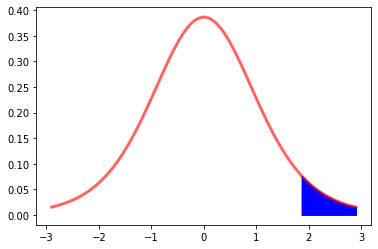

In [307]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats
df = 8

fig, ax = plt.subplots(1, 1)
# Asse x : dal probabilita 0.01 a 0.99
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)
#Y=  Valore distribuzione nel puntox 
y=stats.t.pdf(x, df) # Probability density function.

# Plot distribuzione
ax.plot(x, y, 'r-', lw=3, alpha=0.6, label='t pdf')

q=0.05 # AREA SINISTRA (quantile)

T=stats.t.isf(q, df, loc=0, scale=1) #Inverse survival function (inverse of sf).

x1= np.linspace(T,x[-1], 100)
ax.fill_between(x1,stats.t.pdf(x1, df), color='blue')

print("Punto T (calcolato)    : {:2.3f}".format(T))
print("Area coda destra (nota): {:2.3f}".format(q))


# Funzione di ripartizione (cumulativa) : conosco punto X ottengo area (quantile)

```python
from  scipy import stats

stasts.t.cdf(X, df, loc=0, scale=1) # Cumulative distribution function.
stasts.t.sf(X, df, loc=0, scale=1) # Survaival function : ottengo area destra
```

## Conosco punto : ottengo area (quantile) sinistra
<p style="font-size:140%;">Utilizzo della funzione cdf : Cumulative Distribution Function.</p> 

```python
from  scipy import stats
stasts.t.cdf(X, df, loc=0, scale=1) # Cumulative distribution function.
```

In [313]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats
df = 8
X=1.859
alpha=stats.t.cdf(X, df, loc=0, scale=1) # Cumulative distribution function.
print("Area sinistra al punto [{:2.3f}]={:2.3f}".format(X,alpha))

Area sinistra al punto [1.859]=0.950


## Conosco punto  : ottengo area (quantile) destra
<p style="font-size:140%;">Utilizzo della funzione SF : Survival unction .</p> 

```python
from  scipy import stats
T=1.8
stasts.t.sf(x, df, loc=0, scale=1) # Survaival function : ottengo area destra
```

In [312]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats
df = 8
X=1.859
alpha=stats.t.sf(X, df=df,loc=0,scale=1)
print("Area destra al punto [{:2.3f}]={:2.3f}".format(X,alpha))

Area destra al punto [1.859]=0.050


## Conosco  due punti  : ottengo area compresa
<p style="font-size:140%;">Calcolo area sinistra al punto inferiore, area destra al punto maggiore e le <br>
    sottraggo entrmbe ad 1.</p> 

```python
from  scipy import stats
T=1.8
stasts.t.sf(x, df, loc=0, scale=1) # Survaival function : ottengo area destra
```

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats
df = 8
X1=-1.859
X2=1.859
a1=stats.t.cdf(X1, df, loc=0, scale=1) # Cumulative distribution function.
a2=stats.t.sf(X2, df=df,loc=0,scale=1)
alpha=1-a1-a2
print("Area sottesa ai due punti [{:2.3f}] e [{:2.3f}] ={:2.3f}".
      format(X1,X2,alpha))

Area sottesa ai due punti [-1.859] e [1.859] =0.900


# Creo una tabella
## Utilizzo le funzioni inverse 

### Tabella 1 coda sinistra

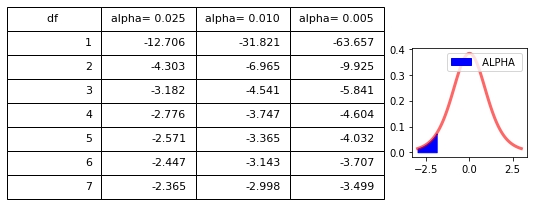

In [10]:
import pandas as pd
q1=0.025
q2=0.01
q3=0.005

cell_text = []

for df in range(1,8):
    a= stats.t.ppf(q1, df, loc=0, scale=1) 
    b=stats.t.ppf(q2, df, loc=0, scale=1) 
    c=stats.t.ppf(q3, df, loc=0, scale=1)
    row=np.array([a,b,c])
    row=np.round(row,3)
    row=np.append(str(df),row)
    cell_text.append(pd.Series(row))


cell_text
# table
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(9,2),
                             gridspec_kw={'width_ratios': [3, 1]})
# PLOT TABLE
#plt.subplot(121,figsize=(10,10))
labels=['df ','alpha= {:2.3f}'.format(q1),'alpha= {:2.3f}'
        .format(q2),'alpha= {:2.3f}'.format(q3)]
table=ax1.table(cellText=cell_text, colLabels=labels, loc='center')
table.set_fontsize(14)
table.scale(1.1, 2)  # may help
ax1.axis('off')


#PLOT TAIL
# Asse x : dal probabilita 0.01 a 0.99
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)
#Y=  Valore distribuzione nel puntox 
y=stats.t.pdf(x, df)
# Plot distribuzione
ax2.plot(x, y, 'r-', lw=3, alpha=0.6)
q=0.05 # AREA SINISTRA (quantile)
T =stats.t.ppf(q, df) # Percent Point Function
x1= np.linspace(x[0],T, 100)
ax2.fill_between(x1,stats.t.pdf(x1, df), color='blue',label=" ALPHA ")
ax2.legend(loc="upper right")
#plt.subplots_adjust(wspace=None, hspace=1)
x=0

### Tabella 1 coda destra

In [383]:
#una coda destra
q1=0.025
q2=0.01
q3=0.005
print(   "    |q = area nella coda destra|")
print(   "    |--------------------------| ")

print(   "gl\q|{:+8.3f}|{:+8.3f}|{:+8.3f}|".format(q1,q2,q3))
print(   "---\---------|--------|--------|")
for df in range(1,8):
    a= stats.t.isf(q1, df, loc=0, scale=1) 
    b=stats.t.isf(q2, df, loc=0, scale=1) 
    c=stats.t.isf(q3, df, loc=0, scale=1) 
    print("{}   |{:+8.3f}|{:+8.3f}|{:+8.3f}|".format(df,a,b,c))

    |q = area nella coda destra|
    |--------------------------| 
gl\q|  +0.025|  +0.010|  +0.005|
---\---------|--------|--------|
1   | +12.706| +31.821| +63.657|
2   |  +4.303|  +6.965|  +9.925|
3   |  +3.182|  +4.541|  +5.841|
4   |  +2.776|  +3.747|  +4.604|
5   |  +2.571|  +3.365|  +4.032|
6   |  +2.447|  +3.143|  +3.707|
7   |  +2.365|  +2.998|  +3.499|


### Tabella due code

In [382]:
q1=0.8
q2=0.9
q3=0.95
print("    |{:28s}|".format(" A = area centrale "))
print("    |{:28s}|".format(" P = area due code "))
print(   "    |--------------------------| ")
print(   "  |A|{:+8.3f}|{:+8.3f}|{:+8.3f}|".format(q1,q2,q3))
print(   "gl|P|{:+8.3f}|{:+8.3f}|{:+8.3f}|".format(1-q1,1-q2,1-q3))
print(   "---\---------|--------|--------|")
for df in range(1,8):
    a= stats.t.interval(q1, df, loc=0, scale=1)[1]
    b=stats.t.interval(q2, df, loc=0, scale=1)[1] 
    c=stats.t.interval(q3, df, loc=0, scale=1)[1] 
    print("{}   |{:+8.3f}|{:+8.3f}|{:+8.3f}|".format(df,a,b,c))

    | A = area centrale          |
    | P = area due code          |
    |--------------------------| 
  |A|  +0.800|  +0.900|  +0.950|
gl|P|  +0.200|  +0.100|  +0.050|
---\---------|--------|--------|
1   |  +3.078|  +6.314| +12.706|
2   |  +1.886|  +2.920|  +4.303|
3   |  +1.638|  +2.353|  +3.182|
4   |  +1.533|  +2.132|  +2.776|
5   |  +1.476|  +2.015|  +2.571|
6   |  +1.440|  +1.943|  +2.447|
7   |  +1.415|  +1.895|  +2.365|
